## 感知机原始算法

### 感知机模型
$$ f(x) = sign(w \bullet x + b) $$
其中sign是符号函数,$$ sign(x) =\begin{cases}
    +1, \qquad  x \ge 0 \\
    -1, \qquad  x \lt 0
    \end{cases} $$
#### 使用随机梯度下降算法进行获取
计算方式为：$$ w = w + \eta y_i x_i$$ $$ b = b + \eta y_i$$


(array([1., 1.]), matrix([[-3]]))

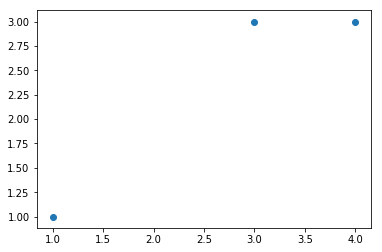

In [41]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt

%matplotlib inline

def getData():
    data = np.mat([[3,3],[4,3],[1,1]])
    label = np.mat([1,1,-1])
    return data,label
import pdb

def perceline(data,label):
    a = 1
    w = np.zeros((1,2))
    b = 0
    flag = True
    (m,n) = data.shape
    while flag:
        flag = False
        for i in range(m):
            value = label[:,i] * (w * data[i,:].T + b)
            if value <= 0:
                w = w + a * label[:,i] * data[i,:]
                b = b + a * label[:,i]
                flag = True
    return w,b
        
## 感知机对偶算法    
def dual_perceline(data,label):
    src_data = np.concatenate((data,label.T),axis=1)
    gram_matrix = np.dot(data,data.T)
    a = np.zeros((3,1))
    b = 0
    flag = True
    m,n = data.shape
    while flag:
        flag = False
        for i in range(m):
            value = 0
            for j in range(m):
                value += a[j,:] * label[:,j] * gram_matrix[i,j]
            if label[:,i] * (value + b) <= 0:
                a[i,:] = a[i,:] + 1
                b = b + label[:,i]
                flag = True
    return a, b


data,label = getData()
plt.scatter(data[:,0].tolist(),data[:,1].tolist())
tmp_data,b = dual_perceline(data,label)
w = np.sum(np.array(tmp_data) * np.array(label.T)* np.array(data),axis = 0)
w,b